In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('all_shots_v5.csv')

In [3]:
df.head()

,Unnamed: 0,Shot Distance,X Location,Y Location,Away Team,Season Type,Year,Shot Zone Basic_Above the Break 3,Shot Zone Basic_Backcourt,Shot Zone Basic_In The Paint (Non-RA),...,PG-SG,SF,SF-SG,SG,SG-PG,E_DEF_RATING,E_OFF_RATING,PCT_PREV_ACTION,PCT_AREA,YEARS_EXP
0,0,19.0,-107.0,167.0,PHI,0.0,2000.0,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,56.465873,35.089974,3.0
1,1,21.0,-115.0,177.0,PHI,0.0,2000.0,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,56.465873,35.089974,3.0
2,2,16.0,165.0,13.0,PHI,0.0,2000.0,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,56.465873,35.089974,3.0
3,3,15.0,0.0,150.0,PHI,0.0,2000.0,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,56.465873,0.749611,3.0
4,4,15.0,0.0,150.0,PHI,0.0,2000.0,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,76.724138,0.749611,3.0


In [4]:
df.columns

Index(['Unnamed: 0', 'Shot Distance', 'X Location', 'Y Location', 'Away Team',
       'Season Type', 'Year', 'Shot Zone Basic_Above the Break 3',
       'Shot Zone Basic_Backcourt', 'Shot Zone Basic_In The Paint (Non-RA)',
       'Shot Zone Basic_Left Corner 3', 'Shot Zone Basic_Mid-Range',
       'Shot Zone Basic_Restricted Area', 'Shot Zone Basic_Right Corner 3',
       'Shot Zone Area_Back Court(BC)', 'Shot Zone Area_Center(C)',
       'Shot Zone Area_Left Side Center(LC)', 'Shot Zone Area_Left Side(L)',
       'Shot Zone Area_Right Side Center(RC)', 'Shot Zone Area_Right Side(R)',
       'Shot Zone Range_16-24 ft.', 'Shot Zone Range_24+ ft.',
       'Shot Zone Range_8-16 ft.', 'Shot Zone Range_Back Court Shot',
       'Shot Zone Range_Less Than 8 ft.', 'GAME_ID', 'EVENTNUM', 'target',
       'PERIOD', 'PLAYER1_NAME', 'PLAYER1_TEAM_ABBREVIATION', 'OPPONENT_TEAM',
       'at_home', 'PREVIOUS_OFF_REBOUND', 'PREVIOUS_DEF_REBOUND',
       'PREVIOUS_OFF_TURNOVER', 'PREVIOUS_OFF_MISSED', 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439450 entries, 0 to 439449
Data columns (total 78 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Unnamed: 0                             439450 non-null  int64  
 1   Shot Distance                          439450 non-null  float64
 2   X Location                             439450 non-null  float64
 3   Y Location                             439450 non-null  float64
 4   Away Team                              439450 non-null  object 
 5   Season Type                            439450 non-null  float64
 6   Year                                   439450 non-null  float64
 7   Shot Zone Basic_Above the Break 3      439450 non-null  bool   
 8   Shot Zone Basic_Backcourt              439450 non-null  bool   
 9   Shot Zone Basic_In The Paint (Non-RA)  439450 non-null  bool   
 10  Shot Zone Basic_Left Corner 3          439450 non-null  

In [6]:
len(df.columns)

78

**::::::::::::::::::::::: LeNet :::::::::::::::::::::::::**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D, Input

# Step 1: Drop unnecessary columns and create new index
df_updated = df.drop(columns=['Unnamed: 0', 'year_start', 'year_end'])
df_updated['GAME_ID_EVENTNUM'] = df_updated['GAME_ID'].astype(str) + '_' + df_updated['EVENTNUM'].astype(str)
df_updated.set_index('GAME_ID_EVENTNUM', inplace=True)
df_updated = df_updated.drop(columns=['GAME_ID', 'EVENTNUM'])

In [8]:
len(df_updated.columns)

73

In [9]:
df_updated.head()

,Shot Distance,X Location,Y Location,Away Team,Season Type,Year,Shot Zone Basic_Above the Break 3,Shot Zone Basic_Backcourt,Shot Zone Basic_In The Paint (Non-RA),Shot Zone Basic_Left Corner 3,...,PG-SG,SF,SF-SG,SG,SG-PG,E_DEF_RATING,E_OFF_RATING,PCT_PREV_ACTION,PCT_AREA,YEARS_EXP
GAME_ID_EVENTNUM,,,,,,,,,,,,,,,,,,,,,
20000001_11,19.0,-107.0,167.0,PHI,0.0,2000.0,False,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,56.465873,35.089974,3.0
20000001_32,21.0,-115.0,177.0,PHI,0.0,2000.0,False,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,56.465873,35.089974,3.0
20000001_34,16.0,165.0,13.0,PHI,0.0,2000.0,False,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,56.465873,35.089974,3.0
20000001_39,15.0,0.0,150.0,PHI,0.0,2000.0,False,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,56.465873,0.749611,3.0
20000001_40,15.0,0.0,150.0,PHI,0.0,2000.0,False,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,76.724138,0.749611,3.0


In [10]:
reduced_variables_list = ['target','Shot Distance','Season Type', 'Shot Zone Basic_In The Paint (Non-RA)', 'Shot Zone Basic_Right Corner 3', 'Shot Zone Area_Right Side(R)', 'Shot Zone Range_8-16 ft.','at_home','PREVIOUS_OFF_MISSED','Age','ASTM','ORBM','FT%','height','weight','C','SG-PG','E_DEF_RATING','PCT_AREA']
df_reduced = df_updated[reduced_variables_list]

In [11]:
len(df_reduced.columns)

19

In [12]:
df_reduced.head()

,target,Shot Distance,Season Type,Shot Zone Basic_In The Paint (Non-RA),Shot Zone Basic_Right Corner 3,Shot Zone Area_Right Side(R),Shot Zone Range_8-16 ft.,at_home,PREVIOUS_OFF_MISSED,Age,ASTM,ORBM,FT%,height,weight,C,SG-PG,E_DEF_RATING,PCT_AREA
GAME_ID_EVENTNUM,,,,,,,,,,,,,,,,,,,
20000001_11,0,19.0,0.0,False,False,False,False,0.0,False,24.0,4.685714,1.014286,0.713,182.88,165.0,0.0,0.0,95.5,35.089974
20000001_32,1,21.0,0.0,False,False,False,False,0.0,False,24.0,4.685714,1.014286,0.713,182.88,165.0,0.0,0.0,95.5,35.089974
20000001_34,0,16.0,0.0,False,False,True,False,0.0,False,24.0,4.685714,1.014286,0.713,182.88,165.0,0.0,0.0,95.5,35.089974
20000001_39,1,15.0,0.0,False,False,False,True,0.0,False,24.0,4.685714,1.014286,0.713,182.88,165.0,0.0,0.0,95.5,0.749611
20000001_40,1,15.0,0.0,False,False,False,True,0.0,True,24.0,4.685714,1.014286,0.713,182.88,165.0,0.0,0.0,95.5,0.749611


In [13]:
# Step 2: Separate target and features
X = df_reduced.drop(columns=['target'])
y = df_reduced['target']

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Identify categorical columns (object type columns)
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Step 5: Define preprocessing for numerical and categorical features
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Step 6: Apply preprocessing (OneHotEncoding for categorical and scaling for numeric)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)  # Set sparse_output=False
    ])

# Step 7: Transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Step 8: Reshape the data for Conv1D (ensure you have a 3D shape for input to Conv1D)
# Convert to dense format (sparse_output=False handles this in OneHotEncoder)
X_train_transformed = X_train_transformed.reshape((X_train_transformed.shape[0], X_train_transformed.shape[1], 1))
X_test_transformed = X_test_transformed.reshape((X_test_transformed.shape[0], X_test_transformed.shape[1], 1))

# Step 9: Build the LeNet model (Conv1D)
model = Sequential([
    Input(shape=(X_train_transformed.shape[1], 1)),  # Use Input layer to define the shape
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Step 10: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 11: Train the model
history = model.fit(X_train_transformed, y_train, epochs=100, batch_size=32, validation_data=(X_test_transformed, y_test))

# Step 12: Evaluate the model
test_loss, test_acc = model.evaluate(X_test_transformed, y_test)
print(f"Test accuracy: {test_acc}")


Epoch 1/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 64s 5ms/step - accuracy: 0.6064 - loss: 0.6597 - val_accuracy: 0.6456 - val_loss: 0.6327
Epoch 2/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - accuracy: 0.6492 - loss: 0.6321 - val_accuracy: 0.6497 - val_loss: 0.6279
Epoch 3/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - accuracy: 0.6555 - loss: 0.6273 - val_accuracy: 0.6509 - val_loss: 0.6261
Epoch 4/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - accuracy: 0.6563 - loss: 0.6262 - val_accuracy: 0.6550 - val_loss: 0.6234
Epoch 5/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step - accuracy: 0.6590 - loss: 0.6228 - val_accuracy: 0.6576 - val_loss: 0.6207
Epoch 6/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 74s 7ms/step - accuracy: 0.6590 - loss: 0.6241 - val_accuracy: 0.6543 - val_loss: 0.6245
Epoch 7/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step - accuracy: 0.6577 - loss: 0.6240 - val_accuracy: 0.6576 - val_loss: 0.6210
Epoch 8/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 70s 6ms/step - ac

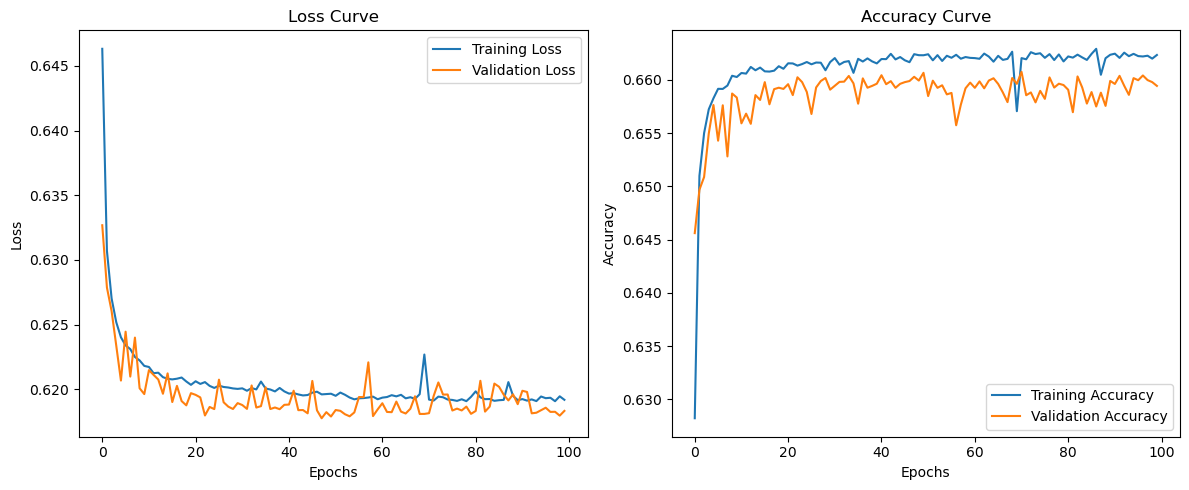

In [14]:
import matplotlib.pyplot as plt

# Retrieve loss and accuracy values from history
loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss
accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy

# Create a figure with two subplots: one for loss and one for accuracy
plt.figure(figsize=(12, 5))

# Plot Loss (Cost) curve
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


2747/2747 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


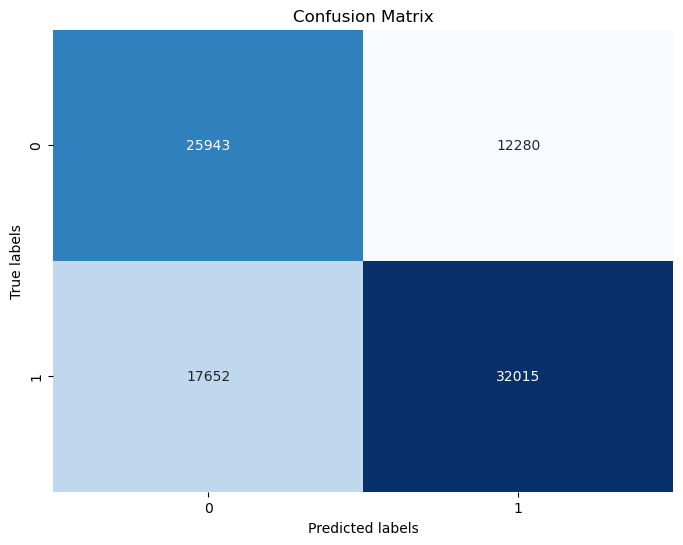

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict on the test set
y_pred = model.predict(X_test_transformed)
y_pred_classes = np.round(y_pred)  # Convert probabilities to binary 0 or 1

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Step 3: Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [16]:
from sklearn.metrics import classification_report

# Step 1: Predict on the test set
y_pred = model.predict(X_test_transformed)
y_pred_classes = np.round(y_pred)  # Convert probabilities to binary 0 or 1

# Step 2: Generate the classification report
report = classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1'])

# Step 3: Print the classification report
print(report)


2747/2747 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.60      0.68      0.63     38223
     Class 1       0.72      0.64      0.68     49667

    accuracy                           0.66     87890
   macro avg       0.66      0.66      0.66     87890
weighted avg       0.67      0.66      0.66     87890



In [17]:
list_test=['Unnamed: 0', 'Shot Distance', 'X Location', 'Y Location', 'Away Team',
       'Season Type', 'Year', 'Shot Zone Basic_Above the Break 3',
       'Shot Zone Basic_Backcourt', 'Shot Zone Basic_In The Paint (Non-RA)',
       'Shot Zone Basic_Left Corner 3', 'Shot Zone Basic_Mid-Range',
       'Shot Zone Basic_Restricted Area', 'Shot Zone Basic_Right Corner 3',
       'Shot Zone Area_Back Court(BC)', 'Shot Zone Area_Center(C)',
       'Shot Zone Area_Left Side Center(LC)', 'Shot Zone Area_Left Side(L)',
       'Shot Zone Area_Right Side Center(RC)', 'Shot Zone Area_Right Side(R)',
       'Shot Zone Range_16-24 ft.', 'Shot Zone Range_24+ ft.',
       'Shot Zone Range_8-16 ft.', 'Shot Zone Range_Back Court Shot',
       'Shot Zone Range_Less Than 8 ft.', 'GAME_ID', 'EVENTNUM', 'target',
       'PERIOD', 'PLAYER1_NAME', 'PLAYER1_TEAM_ABBREVIATION', 'OPPONENT_TEAM',
       'at_home', 'PREVIOUS_OFF_REBOUND', 'PREVIOUS_DEF_REBOUND',
       'PREVIOUS_OFF_TURNOVER', 'PREVIOUS_OFF_MISSED', 'PREVIOUS_EVENTMSGTYPE',
       '3PT', 'jump_shot', 'layup_shot', 'dunk_shot', 'hook_shot',
       'free_throw', 'DETAILLED_SHOT_TYPE', 'minutes_left', 'seconds_left',
       'Age', 'TS%', 'PTM', 'ASTM', 'ORBM', 'STLM', 'BLKM', 'TOVM', 'USG%',
       'FG%', '2P%', '3P%', 'FT%', 'PTS', 'year_start', 'year_end', 'height',
       'weight', 'C', 'PF', 'PG', 'PG-SG', 'SF', 'SF-SG', 'SG', 'SG-PG',
       'E_DEF_RATING', 'E_OFF_RATING', 'PCT_PREV_ACTION', 'PCT_AREA',
       'YEARS_EXP']

In [18]:
len(list_test)

78

In [19]:
reduced_variables_list2 = ['target','Shot Distance','Season Type','at_home','Age','FT%','height','weight','E_DEF_RATING', 'E_OFF_RATING',
                           'Shot Zone Basic_Above the Break 3', 'Shot Zone Basic_Backcourt', 'Shot Zone Basic_In The Paint (Non-RA)', 'Shot Zone Basic_Left Corner 3', 'Shot Zone Basic_Mid-Range', 'Shot Zone Basic_Restricted Area', 'Shot Zone Basic_Right Corner 3',
                           'Shot Zone Area_Back Court(BC)', 'Shot Zone Area_Center(C)', 'Shot Zone Area_Left Side Center(LC)', 'Shot Zone Area_Left Side(L)','Shot Zone Area_Right Side Center(RC)', 'Shot Zone Area_Right Side(R)',
                           'Shot Zone Range_16-24 ft.','Shot Zone Range_24+ ft.','Shot Zone Range_8-16 ft.', 'Shot Zone Range_Back Court Shot','Shot Zone Range_Less Than 8 ft.',
                           'C', 'PF', 'PG', 'PG-SG', 'SF', 'SF-SG', 'SG', 'SG-PG', 'PREVIOUS_OFF_REBOUND', 'PREVIOUS_DEF_REBOUND', 'PREVIOUS_OFF_TURNOVER', 'PREVIOUS_OFF_MISSED','PREVIOUS_OFF_MISSED','ASTM','ORBM','PCT_AREA']


In [20]:
len(reduced_variables_list2)

44

In [21]:
df_reduced2 = df_updated[reduced_variables_list2]

In [22]:
# Step 2: Separate target and features
X = df_reduced2.drop(columns=['target'])
y = df_reduced2['target']

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Identify categorical columns (object type columns)
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Step 5: Define preprocessing for numerical and categorical features
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Step 6: Apply preprocessing (OneHotEncoding for categorical and scaling for numeric)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)  # Set sparse_output=False
    ])

# Step 7: Transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Step 8: Reshape the data for Conv1D (ensure you have a 3D shape for input to Conv1D)
# Convert to dense format (sparse_output=False handles this in OneHotEncoder)
X_train_transformed = X_train_transformed.reshape((X_train_transformed.shape[0], X_train_transformed.shape[1], 1))
X_test_transformed = X_test_transformed.reshape((X_test_transformed.shape[0], X_test_transformed.shape[1], 1))

# Step 9: Build the LeNet model (Conv1D)
model = Sequential([
    Input(shape=(X_train_transformed.shape[1], 1)),  # Use Input layer to define the shape
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Step 10: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 11: Train the model
history = model.fit(X_train_transformed, y_train, epochs=100, batch_size=32, validation_data=(X_test_transformed, y_test))

# Step 12: Evaluate the model
test_loss, test_acc = model.evaluate(X_test_transformed, y_test)
print(f"Test accuracy: {test_acc}")

Epoch 1/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - accuracy: 0.6001 - loss: 0.6633 - val_accuracy: 0.6369 - val_loss: 0.6343
Epoch 2/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - accuracy: 0.6498 - loss: 0.6303 - val_accuracy: 0.6501 - val_loss: 0.6278
Epoch 3/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - accuracy: 0.6574 - loss: 0.6239 - val_accuracy: 0.6542 - val_loss: 0.6228
Epoch 5/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.6558 - loss: 0.6237 - val_accuracy: 0.6530 - val_loss: 0.6233
Epoch 6/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.6581 - loss: 0.6236 - val_accuracy: 0.6560 - val_loss: 0.6221
Epoch 7/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.6602 - loss: 0.6215 - val_accuracy: 0.6582 - val_loss: 0.6217
Epoch 10/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - accuracy: 0.6601 - loss: 0.6212 - val_accuracy: 0.6554 - val_loss: 0.6201
Epoch 11/100
10987/10987 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - 

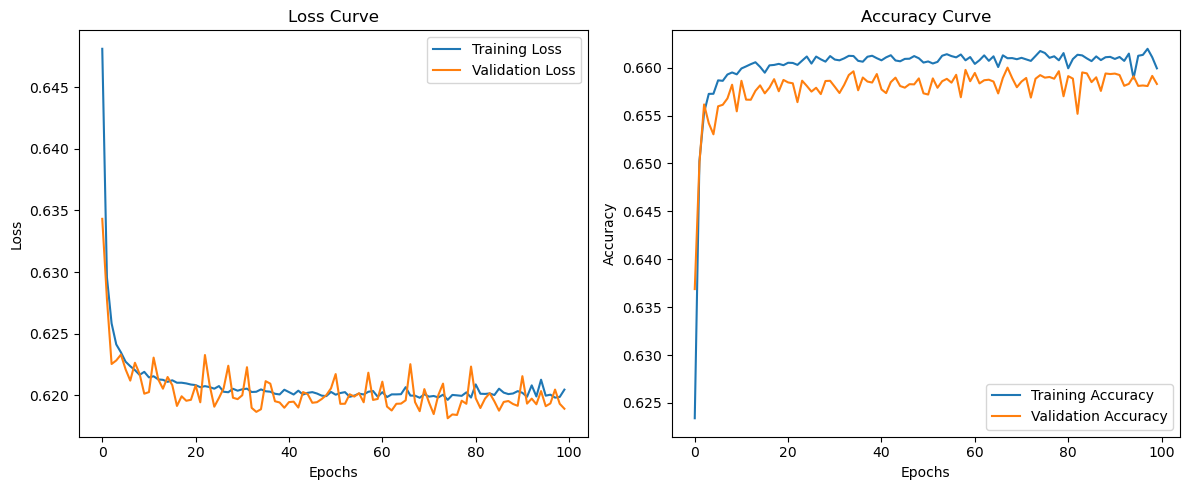

In [23]:
import matplotlib.pyplot as plt

# Retrieve loss and accuracy values from history
loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss
accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy

# Create a figure with two subplots: one for loss and one for accuracy
plt.figure(figsize=(12, 5))

# Plot Loss (Cost) curve
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

2747/2747 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


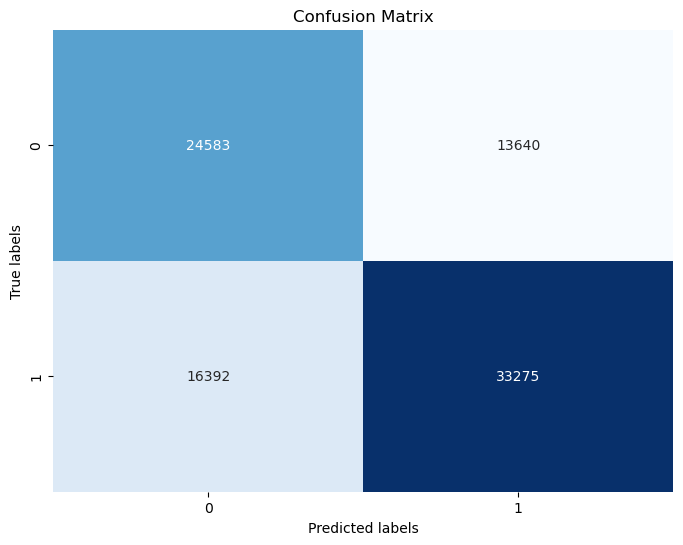

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict on the test set
y_pred = model.predict(X_test_transformed)
y_pred_classes = np.round(y_pred)  # Convert probabilities to binary 0 or 1

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Step 3: Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [25]:
from sklearn.metrics import classification_report

# Step 1: Predict on the test set
y_pred = model.predict(X_test_transformed)
y_pred_classes = np.round(y_pred)  # Convert probabilities to binary 0 or 1

# Step 2: Generate the classification report
report = classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1'])

# Step 3: Print the classification report
print(report)

2747/2747 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

     Class 0       0.60      0.64      0.62     38223
     Class 1       0.71      0.67      0.69     49667

    accuracy                           0.66     87890
   macro avg       0.65      0.66      0.65     87890
weighted avg       0.66      0.66      0.66     87890

